In [1]:
# importing the relevant modules
import gym
import sys
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from collections import defaultdict, deque

In [2]:
# Setting up and initializing the environment
env = gym.make('CliffWalking-v0')
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(4)
State Space Discrete(48)


Episode 5000/5000

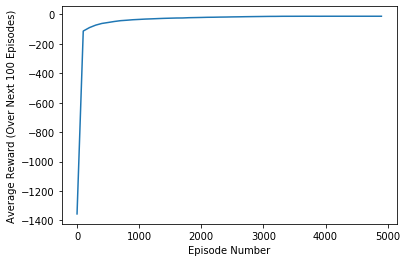

Best Average Reward over 100 Episodes:  -13.0

Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 3  0  3  1  0  1  1  0  1  3  2  0]
 [ 2  0  0  0  1  1  2  1  2  1  3  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


In [3]:
# Returns updated Q-value for the most recent experience
def update_Q(alpha, gamma, Q, state, action, reward, next_state=None):
    current = Q[state][action]  
    Qsa_next = np.max(Q[next_state]) if next_state is not None else 0 
    target = reward + (gamma * Qsa_next)            
    new_value = current + (alpha * (target - current)) 
    return new_value


# Epsilon Greedy Action
def epsilon_greedy(Q, state, nA, eps):
    if random.random() > eps:
        return np.argmax(Q[state])
    else:
        return random.choice(np.arange(env.action_space.n))
    
# QLearning for CliffWalking
def q_learning(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    
    tmp_scores = deque(maxlen=plot_every)     # deque for keeping track of scores
    avg_scores = deque(maxlen=num_episodes)
    
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        score = 0       
        state = env.reset()                           
        eps = 1.0 / i_episode
        
        
        while True:
            action = epsilon_greedy(Q, state, nA, eps)    
            next_state, reward, done, info = env.step(action) 
            score += reward 
            Q[state][action] = update_Q(alpha, gamma, Q, \
                                                 state, action, reward, next_state)        
            state = next_state     
            if done:
                tmp_scores.append(score)      
                break
        if (i_episode % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
            
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))
    return Q


# Obtain optimal policy and action value
Q_LearningMax = q_learning(env, 5000, .01)

# print the estimated optimal policy
max_policy = np.array([np.argmax(Q_LearningMax[key]) if key in Q_LearningMax else -1 for key in np.arange(48)]).reshape((4,12))
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(max_policy)